In [64]:
# -*- coding: utf-8 -*-
import json
import math
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif']=['MS Gothic']
matplotlib.rcParams['axes.unicode_minus']=False

with open('paimon-moe-local-data.json','r') as f:
    json_file = json.load(f)

In [65]:
characters_5star_list = [
    "mona",
    "kamisato_ayaka",
    "qiqi",
    "raiden_shogun",
    "jean",
    "albedo",
    "shenhe",
    "zhongli",
    "yae_miko"]
characters_5star_wish_count = 0
wish_count = 580 + 171
data = json_file.get("wish-counter-character-event")["pulls"]
for i in data:
    if i["id"] in characters_5star_list:
        characters_5star_wish_count += 1
data2 = json_file.get("wish-counter-standard")["pulls"]
for i in data2:
    if i["id"] in characters_5star_list:
        characters_5star_wish_count += 1
print("確率分布:幾何分布")
print("星５獲得回数: {:.2f}".format(characters_5star_wish_count))
p1 = characters_5star_wish_count/wish_count
print("星５の確率: {:.6f}".format(p1))
print("星５の期待値: {:.6f}".format(1/p1))
print("標準偏差： {:.6f}".format(math.sqrt((1-p1)/(p1*p1))))

確率分布:幾何分布
星５獲得回数: 12.00
星５の確率: 0.015979
星５の期待値: 62.583333
標準偏差： 62.081320


In [66]:
mean,variance,skewness,kurtosis=stats.geom.stats(p1,moments="mvsk")
print("E(X):",mean)
print("V(X):",math.sqrt(variance))
print("歪度:",skewness)
print("尖度:",kurtosis)

E(X): 62.583333333333336
V(X): 62.08131987786486
歪度: 2.00006486509863
尖度: 6.000259464602001


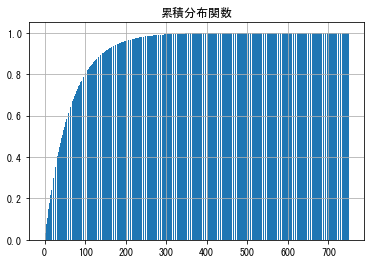

In [67]:
n=wish_count
p=p1
x=range(0,wish_count)
pmf_result=stats.geom.cdf(x,p)

plt.bar(x,pmf_result)
#plt.xlabel('Number of Success')
#plt.ylabel('Probability')
plt.title("累積分布関数")
plt.grid(axis='both')
plt.show()

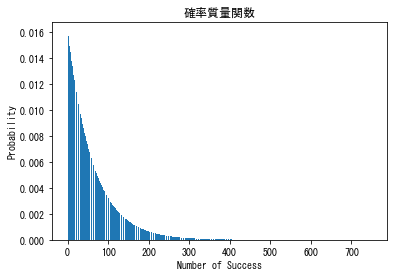

In [68]:
n=wish_count
p=p1
x=range(0,n)
pmf_result=stats.geom.pmf(x,p)

plt.bar(x,pmf_result)
plt.xlabel('Number of Success')
plt.ylabel('Probability')
plt.title("確率質量関数")
plt.show()

In [69]:
z = 1.96
p1_standard_error = z * (math.sqrt((p1*(1-p1))/wish_count))
print("標準誤差：{:.6f}".format(p1_standard_error))
print("母集団確率範囲：[{:.6f},{:.6f}]".format(p1 + p1_standard_error,p1 - p1_standard_error))

標準誤差：0.008968
母集団確率範囲：[0.024947,0.007010]


In [70]:

p0 = 0.016
n = wish_count
significance_level = 0.025
z = abs((p1-p0)/(math.sqrt((p0*(1-p0))/n)))
print("H0:星5が当たる確率は1.6%(P=0.016)")
print("H1:星5が当たる確率は1.6%ではない(P≠0.016)")
print("正規化したz値:",z)
z0 = abs(stats.norm.ppf(significance_level))
print("有意水準5%で、両側検定のz値:",z0)
if z <= z0 :
    print("H0は棄却できない・H0を棄却するための十分な証拠がない")
else:
    print("H0が棄却され、H1を受容する")


H0:星5が当たる確率は1.6%(P=0.016)
H1:星5が当たる確率は1.6%ではない(P≠0.016)
正規化したz値: 0.004653100937838977
有意水準5%で、両側検定のz値: 1.9599639845400545
H0は棄却できない・H0を棄却するための十分な証拠がない


In [71]:
b = stats.binomtest(characters_5star_wish_count,n,p0)
print("P値:",b.pvalue)
print("子集団の確率:",b.proportion_estimate)
interval = b.proportion_ci(0.95)
print("low:",interval.low)
print("high:",interval.high)
if b.pvalue < 0.05:
    print("弁護士を呼ぶ時が来た！")
else:
    print("一先ず安心、課金はほどほど")

P値: 1.0
子集団の確率: 0.015978695073235686
low: 0.008282974761761737
high: 0.02774507655042755
一先ず安心、課金はほどほど
